## SqlAlchemy/Flask homework - Matt Byrd

In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine('sqlite:///raw_data/hawaii.sqlite')

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
session = Session(engine)

In [6]:
# Get last 12 months precipitation data 
# Per helpful TA hints and by querying measurements table, 
# I want precip data from 8/23/16 - 8/23/17 inclusive.
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').all()

In [8]:
# Store the query results in a Dataframe, set index to date, and sort ascending.
precip_data
df = pd.DataFrame(precip_data, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df = df.sort_index()
df['prcp'] = df['prcp'].fillna(value=0)

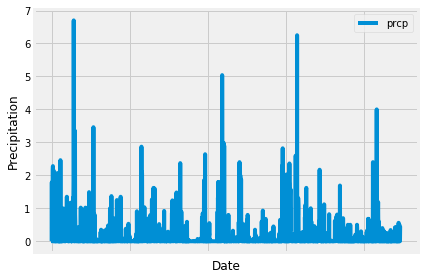

In [9]:
# Make a simple Pandas plot of the results of the above query.
df.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.show()

In [10]:
# Show summary statistics for the last year of data's precipitation
df.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [11]:
# Run an exploratory query to get the total number of measurement stations 
stations = session.query(func.count(Station.id)).all()
stations

[(9)]

In [12]:
# Query the number of observations by each measurement station (descending order)
obs_data = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
# Display the results to get the station with the highest number of observations
obs_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### USC00519281 had the most observations. This station is located just north of Honolulu.

In [13]:
# Get the last 12 months of precipitation data from only station USC00519281
temp_obs = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23', Measurement.station == 'USC00519281').all()
# Get rid of the tuples
tobs_list = [x for (x,) in temp_obs]

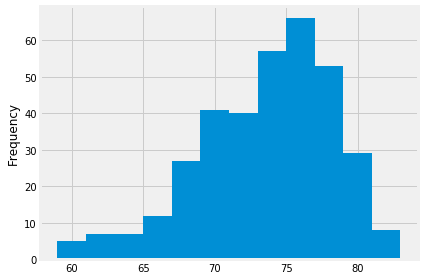

In [14]:
# Plot the results in a Histogram
histogram = plt.hist(x=tobs_list, bins=12)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### The most frequently observed temperatures from this station range from the low to high 70's.